In [1]:
from __future__ import division
import networkx 
import project
import math
import matplotlib.pyplot as plt

In [11]:
%matplotlib

Using matplotlib backend: MacOSX


In [3]:
def run_sim_and_plot(N, t, reps, betas, alphas):
    """Runs the simulation and plots the results with each alpha in the list of guesses for alpha."""
    graphs = project.create_WS_graphs(N,betas)
    averages = project.avg_randwalks(graphs,t,reps)
    runs = []
    for i in range(len(graphs)):
        runs.append(project.Run(betas[i], averages[i]))
    for alpha in alphas:
        fig = plt.figure()
        x_vals, y_vals = project.transform(runs, alpha)
        fig.suptitle('alpha = ' + str(alpha))
        plt.scatter(x_vals, y_vals)

In [4]:
def run_sim_ER(N, t, reps, p):
    """Utility function: runs the simulation for an E-R graph."""
    graphs = [networkx.erdos_renyi_graph(N, p)]
    runs = project.avg_randwalks(graphs,t,reps)
    run = runs[0]
    x_vals = []
    y_vals = []
    for i in range(1,len(run)):
        x_vals.append(i)
        y_vals.append(run[i])
    return x_vals, y_vals

In [5]:
def run_sim_path(N,t,reps):
    """Utility function: runs the simulation for a path."""
    graphs = [networkx.path_graph(N)]
    runs = project.avg_randwalks(graphs,t,reps)
    run = runs[0]
    x_vals = []
    y_vals = []
    for i in range(1,len(run)):
        x_vals.append(i)
        y_vals.append(run[i])
    return x_vals, y_vals

In [6]:
def run_sim_WS(N, t, reps, betas, alpha):
    """Runs the simulation and plots the results with the alpha given."""
    graphs = project.create_WS_graphs(N,betas)
    averages = project.avg_randwalks(graphs,t,reps)
    runs = []
    for i in range(len(graphs)):
        runs.append(project.Run(betas[i], averages[i]))
    x_vals, y_vals = project.transform(runs, alpha)
    return x_vals, y_vals

In [7]:
def run_sim_newman(N, t, reps, betas, alpha):
    """Runs the simulation and plots the results with the alpha given."""
    graphs = project.create_newman_WS_graphs(N,betas)
    averages = project.avg_randwalks(graphs,t,reps)
    runs = []
    for i in range(len(graphs)):
        runs.append(project.Run(betas[i], averages[i]))
    x_vals, y_vals = project.transform(runs, alpha)
    return x_vals, y_vals

In [8]:
x_vals1, y_vals1 = run_sim_ER(10000, 100, 10, 0.001)

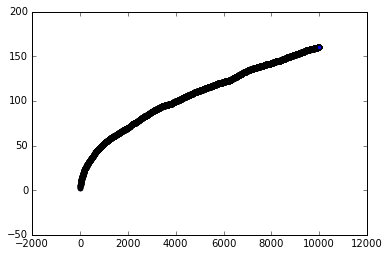

In [9]:
x_vals2, y_vals2 = run_sim_path(10000, 10000, 100)

In [12]:
fig1 = plt.figure()

In [13]:
ax = fig1.add_subplot(1,1,1)

In [15]:
fig1.suptitle('E-R graph, N = 10000, t = 100, p = 0.001, reps = 10')

In [ ]:
ax.scatter(x_vals1, y_vals1)

In [17]:
fig2 = plt.figure()

In [18]:
bx = fig2.add_subplot(1,1,1)

In [20]:
fig2.suptitle('Path graph, N = 10000, t = 10000, reps = 100')

In [21]:
bx.scatter(x_vals2, y_vals2)

In [88]:
x_vals, y_vals = run_sim_WS(10**5, 10**5, 100, [10**(-3),10**(-2.5),10**(-2),10**(-1)], 2)

In [89]:
fig3 = plt.figure()

In [90]:
cx = fig3.add_subplot(1,1,1)

In [91]:
cx.set_xscale('log')

In [92]:
cx.set_yscale('log')

In [93]:
fig3.suptitle('W-S graph, alpha = 2, N = 10^5, t = 10^5, reps = 100, betas = [10^-3, 10^-2.5, 10^-2, 10^-1]')

In [94]:
cx.scatter(x_vals,y_vals)